In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('review_rating.csv')

In [3]:
df

,Unnamed: 0,reviews,ratings
0,0,Just okay.Review After Using 5 Days:\n\n1. SD ...,3
1,1,Really Nice.i am a huge fan of stock Android.T...,4
2,2,Best in the market!In love with this phone. 😍\...,5
3,3,Awesome.Good product.Front camera is 8mp but q...,5
4,4,"Brilliant.First of all, this is a Samsung 2022...",5
...,...,...,...
20163,20167,Everything is amazingIt is a amzing product\nE...,5
20164,20168,Awesome productEverything is good but alexa lo...,5
20165,20169,AwsomeLoved it,5
20166,20170,CallsRegarding notifications specifically call...,5


In [4]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [5]:
df.head(10)

,reviews,ratings
0,Just okay.Review After Using 5 Days:\n\n1. SD ...,3
1,Really Nice.i am a huge fan of stock Android.T...,4
2,Best in the market!In love with this phone. 😍\...,5
3,Awesome.Good product.Front camera is 8mp but q...,5
4,"Brilliant.First of all, this is a Samsung 2022...",5
5,Very Good.Everything is good except the chargi...,4
6,Very Goo.dAfter 2 days of use i am giving this...,4
7,"Really NiceAfter 2 Months of usage,\n\nPros :\...",4
8,"Great Phone, great user experience at this pri...",4
9,WonderfulAt this price it is Very good and exc...,5


In [6]:
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    return ' '.join(new_text)

# Lowercasing

In [7]:
#converting a single row to lowercase.
df['reviews'][10000].lower()

"it works for me perfectlynice sim based router.. if you know about apn settings.. this router works flawlessly.. i'm happy with this one.. wifi range is adequate as per given specifications.. overall great performance is what i'm having."

In [8]:
#converting all the documents in a column to lowercase.
df['reviews'].str.lower()

0        just okay.review after using 5 days:\n\n1. sd ...
1        really nice.i am a huge fan of stock android.t...
2        best in the market!in love with this phone. 😍\...
3        awesome.good product.front camera is 8mp but q...
4        brilliant.first of all, this is a samsung 2022...
                               ...                        
20163    everything is amazingit is a amzing product\ne...
20164    awesome producteverything is good but alexa lo...
20165                                       awsomeloved it
20166    callsregarding notifications specifically call...
20167      outstanding watchfeel happy with the same watch
Name: reviews, Length: 20168, dtype: object

In [9]:
df['reviews']=df['reviews'].str.lower()

# Removing HTML tags

In [10]:
import re
def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub('r',text)

In [11]:
df['reviews'][5]

'very good.everything is good except the charging adaptor and camera quality. specially the camera is not upto mark. camera quality is just okay neither too bad nor too good 2.7/5 stars.\nalso note that as this model is very new. so back cover is not available in market easily.\nf23 photos are not sharp and crisp. poco was better. i had bought the phone and camera is not good. xiaomi and poco vivo are offering better camera. you have to make a choice between processor vs camera. if you want camera then do...'

In [12]:
remove_html_tags(df['reviews'][5])

'very good.everything is good except the charging adaptor and camera quality. specially the camera is not upto mark. camera quality is just okay neither too bad nor too good 2.7/5 stars.\nalso note that as this model is very new. so back cover is not available in market easily.\nf23 photos are not sharp and crisp. poco was better. i had bought the phone and camera is not good. xiaomi and poco vivo are offering better camera. you have to make a choice between processor vs camera. if you want camera then do...'

In [13]:
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [14]:
cleanhtml(df['reviews'][5])

'very good.everything is good except the charging adaptor and camera quality. specially the camera is not upto mark. camera quality is just okay neither too bad nor too good 2.7/5 stars.\nalso note that as this model is very new. so back cover is not available in market easily.\nf23 photos are not sharp and crisp. poco was better. i had bought the phone and camera is not good. xiaomi and poco vivo are offering better camera. you have to make a choice between processor vs camera. if you want camera then do...'

In [15]:
df['reviews']=df['reviews'].apply(remove_html_tags)

In [16]:
df['reviews']

0        just okay.review after using 5 days:\n\n1. sd ...
1        really nice.i am a huge fan of stock android.t...
2        best in the market!in love with this phone. 😍\...
3        awesome.good product.front camera is 8mp but q...
4        brilliant.first of all, this is a samsung 2022...
                               ...                        
20163    everything is amazingit is a amzing product\ne...
20164    awesome producteverything is good but alexa lo...
20165                                       awsomeloved it
20166    callsregarding notifications specifically call...
20167      outstanding watchfeel happy with the same watch
Name: reviews, Length: 20168, dtype: object

# Remove urls

In [17]:
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [18]:
df['reviews']=df['reviews'].apply(remove_url)

In [19]:
#https://www.flipnwork.com/index.php/dashboard

In [20]:
remove_url('https://www.flipnwork.com/index.php/dashboard')

''

# Removing punctuation.

In [21]:
import string,time

In [22]:
string.punctuation #these are considered as punctuation marks by python.

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
exclude=string.punctuation

In [24]:
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,' ')
    return text

#this method takes too much time.

In [25]:
df['reviews']=df['reviews'].apply(remove_punc)

In [26]:
df['reviews']

0        just okay review after using 5 days \n\n1  sd ...
1        really nice i am a huge fan of stock android t...
2        best in the market in love with this phone  😍\...
3        awesome good product front camera is 8mp but q...
4        brilliant first of all  this is a samsung 2022...
                               ...                        
20163    everything is amazingit is a amzing product\ne...
20164    awesome producteverything is good but alexa lo...
20165                                       awsomeloved it
20166    callsregarding notifications specifically call...
20167      outstanding watchfeel happy with the same watch
Name: reviews, Length: 20168, dtype: object

In [27]:
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))

#this method is faster and should be used for large datasets.

# Chat word treatment

In [28]:
import csv

with open('Abbreviations and Slang.csv', mode='r') as infile:
    reader = csv.reader(infile)
    chat_w_dict = {rows[0]:rows[1] for rows in reader}

In [29]:
chat_w_dict

{'Abbreviations': 'Text',
 'lol': 'laughing',
 'rofl': 'laughing',
 'brb': 'be right back',
 'ily': 'i love you',
 'ty': 'thank you',
 'imy': 'i miss you',
 'yolo': 'you only live once',
 'fomo': 'fear of missing out',
 'idk': 'i do not know',
 'idc': 'i do not care',
 'ffs': 'for freaks sake',
 'smh': 'shake my head',
 'ngl': 'not going to lie',
 'w': 'with',
 'abt': 'about',
 'u': 'you only live once',
 'r': 'are',
 'gtg': 'going to go',
 'nvm': 'never mind',
 'bcoz': 'because',
 'coz': 'because',
 'bcos': 'because',
 'cld': 'could',
 'ez': 'easy',
 'fbm': 'fine by me',
 'ftw': 'for the win',
 'fyi': 'for your information',
 'ik': 'i know',
 'wfh': 'work from home',
 'lmfao': 'laughing my freaking ass off',
 'lmk': 'let me know',
 'af': 'as freak',
 'aight': 'alright',
 'awol': 'away without leaving',
 'irl ': 'in real life',
 'bt': 'bad trip',
 'bb': 'baby',
 'btw': 'by the way ',
 'cu': 'see you',
 'idgaf': "i don't give a freak",
 'dgaf': "don't give a freak",
 'df': 'the freak ',

In [30]:
#function for converting chat words into normal words
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.lower() in chat_w_dict.keys():
            new_text.append(chat_w_dict[w.lower()])
        else:
            new_text.append(w)
    return ' '.join(new_text)

In [31]:
chat_conversion('I gtg')

'I going to go'

In [32]:
df['reviews']=df['reviews'].apply(chat_conversion)

# Spell correction

In [33]:
from textblob import TextBlob

In [34]:
textBlb=TextBlob('I am vry bd') #initiating object from class.

In [35]:
textBlb.correct().string

'I am very by'

In [36]:
def spell_correction(text):
    from textblob import TextBlob
    textBlb=TextBlob(text)
    return textBlb.correct().string

In [37]:
#df['reviews'].apply(spell_correction) #This was not applied because it was taking a lot of time.

# Removing Stop words

In [38]:
from nltk.corpus import stopwords

In [39]:
stopwords.words('english') #These are the stop words in english language.

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    return ' '.join(new_text)

In [41]:
remove_stopwords('Do it yourself')

'Do  '

In [42]:
df['reviews']=df['reviews'].apply(remove_stopwords)

In [43]:
df['reviews'][5]

' good everything  good except  charging adaptor  camera quality specially  camera   upto mark camera quality   okay neither  bad   good 2 7 5 stars also note    model   new  back cover   available  market easily f23 photos   sharp  crisp poco  better   bought  phone  camera   good xiaomi  poco vivo  offering better camera    make  choice  processor vs camera   want camera  '

# Handling Emogis

In [44]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    print(emoji_pattern.sub(r'', text)) # no emoji

In [45]:
df['reviews']

0         okay review  using 5 days 1 sd 750 works  wel...
1        really nice    huge fan  stock android    firs...
2        best   market  love   phone 😍  first samsung p...
3        awesome good product front camera  8mp  qualit...
4        brilliant first      samsung 2022 5g phone pro...
                               ...                        
20163    everything  amazingit   amzing product everyth...
20164    awesome producteverything  good  alexa lost  c...
20165                                         awsomeloved 
20166    callsregarding notifications specifically call...
20167                 outstanding watchfeel happy    watch
Name: reviews, Length: 20168, dtype: object

In [46]:
df['reviews'][2]

'best   market  love   phone 😍  first samsung phone    really worth  bgmi cod asphalt   running smoothly   device made  great choice thanks flipkart'

In [47]:
remove_emojis(df['reviews'][2]) #test successful. Emoji removed.

best   market  love   phone   first samsung phone    really worth  bgmi cod asphalt   running smoothly   device made  great choice thanks flipkart


In [48]:
#replacing emoji with its meaning
import emoji
print(emoji.demojize(df['reviews'][2]))

best   market  love   phone :smiling_face_with_heart-eyes:  first samsung phone    really worth  bgmi cod asphalt   running smoothly   device made  great choice thanks flipkart


In [49]:
def replace_emojis(text):
    return emoji.demojize(text)

In [50]:
#here we will be replacing the emojis with the respective meaning
df['reviews']=df['reviews'].apply(replace_emojis)

In [51]:
df['reviews']

0         okay review  using 5 days 1 sd 750 works  wel...
1        really nice    huge fan  stock android    firs...
2        best   market  love   phone :smiling_face_with...
3        awesome good product front camera  8mp  qualit...
4        brilliant first      samsung 2022 5g phone pro...
                               ...                        
20163    everything  amazingit   amzing product everyth...
20164    awesome producteverything  good  alexa lost  c...
20165                                         awsomeloved 
20166    callsregarding notifications specifically call...
20167                 outstanding watchfeel happy    watch
Name: reviews, Length: 20168, dtype: object

In [52]:
df['reviews']=df['reviews'].apply(remove_punc)

In [53]:
df['reviews']

0         okay review  using 5 days 1 sd 750 works  wel...
1        really nice    huge fan  stock android    firs...
2        best   market  love   phone  smiling face with...
3        awesome good product front camera  8mp  qualit...
4        brilliant first      samsung 2022 5g phone pro...
                               ...                        
20163    everything  amazingit   amzing product everyth...
20164    awesome producteverything  good  alexa lost  c...
20165                                         awsomeloved 
20166    callsregarding notifications specifically call...
20167                 outstanding watchfeel happy    watch
Name: reviews, Length: 20168, dtype: object

# Tokenization

In [54]:
#simpliest means of tokenization
df['reviews'][2].split()

['best',
 'market',
 'love',
 'phone',
 'smiling',
 'face',
 'with',
 'heart',
 'eyes',
 'first',
 'samsung',
 'phone',
 'really',
 'worth',
 'bgmi',
 'cod',
 'asphalt',
 'running',
 'smoothly',
 'device',
 'made',
 'great',
 'choice',
 'thanks',
 'flipkart']

In [55]:
#sentence tokenization using split()
df['reviews'][3].split('.')

['awesome good product front camera  8mp  quality   good display   good 120 hz   smooth  use']

In [56]:
#best method to tokenize is using nltk library.
from nltk.tokenize import word_tokenize,sent_tokenize

In [57]:
sent1='I am going to visit New Delhi!'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'visit', 'New', 'Delhi', '!']

In [58]:
#!pip install spacy

In [59]:
#Spacy library id the best
import spacy
#nlp=spacy.load('en_core_web_sm')

# Stemming and lemmetization

In [60]:
from nltk.stem.porter import PorterStemmer

In [61]:
ps=PorterStemmer()
def stem_words(text):
    return ' '.join([ps.stem(word) for word in text.split()])

In [62]:
#ps.stem(word) for word in df['review'][1255].split()

In [63]:
stem_words(df['reviews'][1255])

'satisfiedbuild qualiti good heavi camera qualiti averag valu money'

In [64]:
stem_words('walk walking walker walked')

'walk walk walker walk'

In [66]:
df

,reviews,ratings
0,okay review using 5 days 1 sd 750 works wel...,3
1,really nice huge fan stock android firs...,4
2,best market love phone smiling face with...,5
3,awesome good product front camera 8mp qualit...,5
4,brilliant first samsung 2022 5g phone pro...,5
...,...,...
20163,everything amazingit amzing product everyth...,5
20164,awesome producteverything good alexa lost c...,5
20165,awsomeloved,5
20166,callsregarding notifications specifically call...,5


In [67]:
df.to_csv('pre_processed_review_ratings')

In [255]:
df=pd.read_csv('pre_processed_review_ratings')

In [256]:
df

,Unnamed: 0,reviews,ratings
0,0,okay review using 5 days 1 sd 750 works wel...,3
1,1,really nice huge fan stock android firs...,4
2,2,best market love phone smiling face with...,5
3,3,awesome good product front camera 8mp qualit...,5
4,4,brilliant first samsung 2022 5g phone pro...,5
...,...,...,...
20163,20163,everything amazingit amzing product everyth...,5
20164,20164,awesome producteverything good alexa lost c...,5
20165,20165,awsomeloved,5
20166,20166,callsregarding notifications specifically call...,5


In [257]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv=CountVectorizer(max_features=5000,stop_words='english') #creating object from class

In [258]:
#cv.fit_transform(df['reviews']).toarray()

In [259]:
#cv.fit_transform(df['reviews']).toarray().shape

In [260]:
#cv.get_feature_names()

In [261]:
#vectors=cv.fit_transform(df['reviews']).toarray()

In [262]:
#vectors

In [263]:
#type(vectors)

In [264]:
#vector_df=pd.DataFrame(vectors)

In [265]:
#vector_df

In [266]:
#vector_df['ratings']=df['ratings']

In [267]:
#vector_df

In [268]:
import gensim

In [269]:
#gensim.utils.simple_preprocess() #is used to do preprocessing, Also it tokenizes the documents.

In [270]:
df['reviews_1']=df['reviews'].apply(gensim.utils.simple_preprocess)

In [271]:
df['reviews'][25]

'awesomemany people  complaining  battery drainage  heating issues    faced      one week  usage camera  perfect   price range samsung one ui 4 1   best display obviously   much good   amoled display  still   nice bright  clear performance  superb  lags  daily usage     gamer   live   easily perform multitasking   120hz touch rate helps  giving  smoother experience overall bonus samsung  usefull'

In [272]:
df['reviews_1'][25]

['awesomemany',
 'people',
 'complaining',
 'battery',
 'drainage',
 'heating',
 'issues',
 'faced',
 'one',
 'week',
 'usage',
 'camera',
 'perfect',
 'price',
 'range',
 'samsung',
 'one',
 'ui',
 'best',
 'display',
 'obviously',
 'much',
 'good',
 'amoled',
 'display',
 'still',
 'nice',
 'bright',
 'clear',
 'performance',
 'superb',
 'lags',
 'daily',
 'usage',
 'gamer',
 'live',
 'easily',
 'perform',
 'multitasking',
 'hz',
 'touch',
 'rate',
 'helps',
 'giving',
 'smoother',
 'experience',
 'overall',
 'bonus',
 'samsung',
 'usefull']

In [273]:
#from nltk.tokenize import word_tokenize
#review_text=df['reviews'].apply(word_tokenize)

In [274]:
#review_text

In [275]:
model=gensim.models.Word2Vec(window=10,min_count=2,workers=2,vector_size=150) #initialising the model.
#vary the min_count and test the model accuracies

In [276]:
model.build_vocab(df['reviews_1']) #vocabulary refers to the unique words present in the corpus

In [277]:
model.corpus_count

20168

In [278]:
model.epochs

5

In [279]:
df['reviews_1']

0        [okay, review, using, days, sd, works, well, g...
1        [really, nice, huge, fan, stock, android, firs...
2        [best, market, love, phone, smiling, face, wit...
3        [awesome, good, product, front, camera, mp, qu...
4        [brilliant, first, samsung, phone, pros, andro...
                               ...                        
20163    [everything, amazingit, amzing, product, every...
20164    [awesome, good, alexa, lost, connection, log, ...
20165                                        [awsomeloved]
20166    [callsregarding, notifications, specifically, ...
20167               [outstanding, watchfeel, happy, watch]
Name: reviews_1, Length: 20168, dtype: object

In [280]:
df.shape[0]

20168

In [281]:
df=df[df['reviews_1'].str.len()>1]

In [282]:
df.shape[0]

19896

In [283]:
model.train(df['reviews_1'],total_examples=model.corpus_count,epochs=model.epochs)

(1709333, 2007910)

In [284]:
model.wv.most_similar('cheap')

[('footpath', 0.8968591094017029),
 ('expect', 0.8911007046699524),
 ('chinese', 0.8897256851196289),
 ('liking', 0.8778238892555237),
 ('sony', 0.8718349933624268),
 ('made', 0.8716050386428833),
 ('looking', 0.8697550296783447),
 ('recommend', 0.8682752847671509),
 ('headphones', 0.8649634122848511),
 ('earsi', 0.8621803522109985)]

In [285]:
model.wv.most_similar('worst')

[('ever', 0.8995346426963806),
 ('pathetic', 0.8569191694259644),
 ('bad', 0.8393334746360779),
 ('experience', 0.8371626734733582),
 ('seen', 0.8071476817131042),
 ('productworst', 0.8034318089485168),
 ('servicevery', 0.8021000623703003),
 ('expirience', 0.7972426414489746),
 ('serviceworst', 0.7966505289077759),
 ('never', 0.7869301438331604)]

In [286]:
model.wv.index_to_key

['good',
 'product',
 'quality',
 'phone',
 'one',
 'working',
 'buy',
 'sound',
 'camera',
 'use',
 'battery',
 'price',
 'also',
 'time',
 'bad',
 'charging',
 'money',
 'like',
 'mobile',
 'best',
 'power',
 'using',
 'even',
 'printer',
 'amazon',
 'charge',
 'better',
 'get',
 'worst',
 'router',
 'poor',
 'go',
 'months',
 'face',
 'boat',
 'sim',
 'great',
 'bass',
 'low',
 'days',
 'work',
 'samsung',
 'used',
 'nice',
 'got',
 'print',
 'speed',
 'much',
 'range',
 'bank',
 'waste',
 'wifi',
 'fast',
 'ok',
 'really',
 'problem',
 'worth',
 'easy',
 'device',
 'earphones',
 'well',
 'bought',
 'stopped',
 'month',
 'service',
 'works',
 'life',
 'return',
 'cartridge',
 'side',
 'overall',
 'issue',
 'need',
 'please',
 'ink',
 'average',
 'ear',
 'watch',
 'want',
 'support',
 'signal',
 'warranty',
 'value',
 'purchase',
 'live',
 'day',
 'earphone',
 'mah',
 'fine',
 'heavy',
 'performance',
 'properly',
 'budget',
 'display',
 'call',
 'replacement',
 'voice',
 'times',
 '

In [287]:
df['reviews'][1]

'really nice    huge fan  stock android    first samsung phone  biggest concern  purchasing   annoying apps   come   phone  whether  would  able  remove   surprises   quite   useless apps   able remove       initial setup   minefield   accept subscription  samsung   tried  carefully avoided subscrbing  camera quality  images surprised     expecting  quality   '

In [288]:
df

,Unnamed: 0,reviews,ratings,reviews_1
0,0,okay review using 5 days 1 sd 750 works wel...,3,"[okay, review, using, days, sd, works, well, g..."
1,1,really nice huge fan stock android firs...,4,"[really, nice, huge, fan, stock, android, firs..."
2,2,best market love phone smiling face with...,5,"[best, market, love, phone, smiling, face, wit..."
3,3,awesome good product front camera 8mp qualit...,5,"[awesome, good, product, front, camera, mp, qu..."
4,4,brilliant first samsung 2022 5g phone pro...,5,"[brilliant, first, samsung, phone, pros, andro..."
...,...,...,...,...
20162,20162,love device supporting app using watch ...,5,"[love, device, supporting, app, using, watch, ..."
20163,20163,everything amazingit amzing product everyth...,5,"[everything, amazingit, amzing, product, every..."
20164,20164,awesome producteverything good alexa lost c...,5,"[awesome, good, alexa, lost, connection, log, ..."
20166,20166,callsregarding notifications specifically call...,5,"[callsregarding, notifications, specifically, ..."


In [289]:
#code for converting sentences to vector
#def document_vector(doc):
    #doc=[word for word in doc.split() if word in model.wv.index_to_key]
    #return np.mean(model.wv[doc],axis=0)

In [290]:
#document_vector(df['reviews_1'].values[0])

In [291]:
def document_vector(doc):
    doc=[word for word in doc if word in model.wv.index_to_key]
    return np.mean(model.wv[doc],axis=0)

In [292]:
document_vector(df['reviews_1'].values[0])

array([ 0.5446584 ,  0.02224328,  0.15881644,  0.13642651,  0.05097851,
       -0.07354442, -0.367009  , -0.1445801 ,  0.0186839 ,  0.19647911,
        0.28287232, -0.30790496, -0.04858282, -0.08077927, -0.03805682,
        0.23923568, -0.07989346,  0.2426273 , -0.03424171,  0.4226262 ,
       -0.01653542,  0.25586507, -0.08430348,  0.16763411, -0.34299773,
       -0.11075393, -0.26420262,  0.02228456, -0.175951  ,  0.02294648,
       -0.15084681, -0.3636769 , -0.14666678, -0.6136525 , -0.23215002,
       -0.14405625, -0.18789709,  0.2586637 ,  0.14276494,  0.30055034,
       -0.0886799 , -0.26366633, -0.22172596, -0.19353697,  0.16268681,
        0.08904818, -0.05076034,  0.26058686,  0.03507513,  0.04473273,
        0.00094365, -0.1844542 ,  0.07898276,  0.02473559, -0.22348343,
       -0.24363136,  0.1583609 ,  0.09147169, -0.4954822 ,  0.02451095,
       -0.17237313, -0.15933739, -0.04671616,  0.5062836 ,  0.03463453,
       -0.22718391, -0.3539622 , -0.5146209 , -0.6548643 , -0.31

In [293]:
document_vector(df['reviews_1'].values[0]).shape

(150,)

In [294]:
len(document_vector(df['reviews_1'].values[0]))

150

In [295]:
model.wv.most_similar('worst')

[('ever', 0.8995346426963806),
 ('pathetic', 0.8569191694259644),
 ('bad', 0.8393334746360779),
 ('experience', 0.8371626734733582),
 ('seen', 0.8071476817131042),
 ('productworst', 0.8034318089485168),
 ('servicevery', 0.8021000623703003),
 ('expirience', 0.7972426414489746),
 ('serviceworst', 0.7966505289077759),
 ('never', 0.7869301438331604)]

In [296]:
model.wv.most_similar('best')

[('anker', 0.8966493606567383),
 ('budget', 0.885025680065155),
 ('avrage', 0.8790796995162964),
 ('affordable', 0.876566469669342),
 ('dslr', 0.8719844818115234),
 ('segment', 0.8694615960121155),
 ('looking', 0.867879331111908),
 ('choice', 0.8633478283882141),
 ('pricebest', 0.8626770973205566),
 ('bankbest', 0.8614201545715332)]

In [297]:
model.wv.most_similar('good')

[('overall', 0.9082991480827332),
 ('decent', 0.8937951326370239),
 ('excellent', 0.8878982663154602),
 ('average', 0.8832243084907532),
 ('nice', 0.8816467523574829),
 ('lowgood', 0.8781350255012512),
 ('great', 0.8721754550933838),
 ('soundthe', 0.853046178817749),
 ('goodthis', 0.8515188694000244),
 ('build', 0.849623441696167)]

In [298]:
model.wv.most_similar('bad')

[('poor', 0.8922704458236694),
 ('worst', 0.8393335342407227),
 ('experiencevery', 0.8066467642784119),
 ('servicevery', 0.8048756718635559),
 ('productquality', 0.7982105612754822),
 ('qualityworst', 0.7823196649551392),
 ('thisvery', 0.7787518501281738),
 ('pathetic', 0.7781847715377808),
 ('experience', 0.7646463513374329),
 ('everworst', 0.7594550251960754)]

In [299]:
from tqdm import tqdm

In [300]:
df.shape[0]

19896

In [301]:
#for i in range(df.shape[0]):
    #if len(df['reviews_1'][i])==0:
       # df=df.drop(index=i,axis=0)
        

In [302]:
df['reviews_1'][132]

['terrific', 'purchasenice', 'phone']

In [303]:
df

,Unnamed: 0,reviews,ratings,reviews_1
0,0,okay review using 5 days 1 sd 750 works wel...,3,"[okay, review, using, days, sd, works, well, g..."
1,1,really nice huge fan stock android firs...,4,"[really, nice, huge, fan, stock, android, firs..."
2,2,best market love phone smiling face with...,5,"[best, market, love, phone, smiling, face, wit..."
3,3,awesome good product front camera 8mp qualit...,5,"[awesome, good, product, front, camera, mp, qu..."
4,4,brilliant first samsung 2022 5g phone pro...,5,"[brilliant, first, samsung, phone, pros, andro..."
...,...,...,...,...
20162,20162,love device supporting app using watch ...,5,"[love, device, supporting, app, using, watch, ..."
20163,20163,everything amazingit amzing product everyth...,5,"[everything, amazingit, amzing, product, every..."
20164,20164,awesome producteverything good alexa lost c...,5,"[awesome, good, alexa, lost, connection, log, ..."
20166,20166,callsregarding notifications specifically call...,5,"[callsregarding, notifications, specifically, ..."


In [304]:
df=df.reset_index()

In [305]:
df

,index,Unnamed: 0,reviews,ratings,reviews_1
0,0,0,okay review using 5 days 1 sd 750 works wel...,3,"[okay, review, using, days, sd, works, well, g..."
1,1,1,really nice huge fan stock android firs...,4,"[really, nice, huge, fan, stock, android, firs..."
2,2,2,best market love phone smiling face with...,5,"[best, market, love, phone, smiling, face, wit..."
3,3,3,awesome good product front camera 8mp qualit...,5,"[awesome, good, product, front, camera, mp, qu..."
4,4,4,brilliant first samsung 2022 5g phone pro...,5,"[brilliant, first, samsung, phone, pros, andro..."
...,...,...,...,...,...
19891,20162,20162,love device supporting app using watch ...,5,"[love, device, supporting, app, using, watch, ..."
19892,20163,20163,everything amazingit amzing product everyth...,5,"[everything, amazingit, amzing, product, every..."
19893,20164,20164,awesome producteverything good alexa lost c...,5,"[awesome, good, alexa, lost, connection, log, ..."
19894,20166,20166,callsregarding notifications specifically call...,5,"[callsregarding, notifications, specifically, ..."


In [306]:
df=df.drop(columns=['index'],axis=1)

In [307]:
df=df.drop(columns=['Unnamed: 0','reviews'],axis=1)

In [308]:
df

,ratings,reviews_1
0,3,"[okay, review, using, days, sd, works, well, g..."
1,4,"[really, nice, huge, fan, stock, android, firs..."
2,5,"[best, market, love, phone, smiling, face, wit..."
3,5,"[awesome, good, product, front, camera, mp, qu..."
4,5,"[brilliant, first, samsung, phone, pros, andro..."
...,...,...
19891,5,"[love, device, supporting, app, using, watch, ..."
19892,5,"[everything, amazingit, amzing, product, every..."
19893,5,"[awesome, good, alexa, lost, connection, log, ..."
19894,5,"[callsregarding, notifications, specifically, ..."


In [309]:
df['reviews_1'][132]

['worthlessbetter', 'something', 'better', 'like', 'speed', 'battery']

In [310]:
df['reviews_1'].values

array([list(['okay', 'review', 'using', 'days', 'sd', 'works', 'well', 'give', 'good', 'performance', 'fingerprint', 'sensor', 'quick', 'responsive', 'camera', 'mark', 'many', 'devices', 'range', 'perform', 'well', 'comparatively', 'charing', 'adapter', 'provided', 'box', 'gives', 'bad', 'impression', 'although', 'device', 'supports', 'see', 'charging', 'speed', 'analysis', 'samsung', 'keyboard', 'haptic', 'feedback', 'awesome', 'tried', 'keyboard', 'knox', 'security', 'present']),
       list(['really', 'nice', 'huge', 'fan', 'stock', 'android', 'first', 'samsung', 'phone', 'biggest', 'concern', 'purchasing', 'annoying', 'apps', 'come', 'phone', 'whether', 'would', 'able', 'remove', 'surprises', 'quite', 'useless', 'apps', 'able', 'remove', 'initial', 'setup', 'minefield', 'accept', 'subscription', 'samsung', 'tried', 'carefully', 'avoided', 'subscrbing', 'camera', 'quality', 'images', 'surprised', 'expecting', 'quality']),
       list(['best', 'market', 'love', 'phone', 'smiling', 'f

In [311]:
df=df.drop(index=132,axis=0)

In [312]:
df['reviews_1'][5687]

['𝓑𝓮𝓼𝓽𝓥𝓮𝓻𝔂', '𝓖𝓸𝓸𝓭', '𝓹𝓻𝓸𝓭𝓾𝓬𝓽']

In [313]:
df=df.drop(index=5687,axis=0)

In [314]:
df.reset_index(inplace=True)

In [315]:
df['reviews_1'][7679]

['one', 'starno', 'use']

In [320]:
df=df.drop(index=7678,axis=0)

In [322]:
df

,level_0,index,ratings,reviews_1
0,0,0,3,"[okay, review, using, days, sd, works, well, g..."
1,1,1,4,"[really, nice, huge, fan, stock, android, firs..."
2,2,2,5,"[best, market, love, phone, smiling, face, wit..."
3,3,3,5,"[awesome, good, product, front, camera, mp, qu..."
4,4,4,5,"[brilliant, first, samsung, phone, pros, andro..."
...,...,...,...,...
19888,19889,19891,5,"[love, device, supporting, app, using, watch, ..."
19889,19890,19892,5,"[everything, amazingit, amzing, product, every..."
19890,19891,19893,5,"[awesome, good, alexa, lost, connection, log, ..."
19891,19892,19894,5,"[callsregarding, notifications, specifically, ..."


In [323]:
df=df.drop(columns=['level_0','index'],axis=1)

In [324]:
df.reset_index(inplace=True)

In [326]:
df=df.drop(index=7763,axis=0)

In [333]:
df=df.drop(columns=['index'],axis=1)


In [334]:
df=df.reset_index(drop=True)

In [335]:
df

,ratings,reviews_1
0,3,"[okay, review, using, days, sd, works, well, g..."
1,4,"[really, nice, huge, fan, stock, android, firs..."
2,5,"[best, market, love, phone, smiling, face, wit..."
3,5,"[awesome, good, product, front, camera, mp, qu..."
4,5,"[brilliant, first, samsung, phone, pros, andro..."
...,...,...
19885,5,"[love, device, supporting, app, using, watch, ..."
19886,5,"[everything, amazingit, amzing, product, every..."
19887,5,"[awesome, good, alexa, lost, connection, log, ..."
19888,5,"[callsregarding, notifications, specifically, ..."


In [337]:
df=df.drop(index=9256,axis=0)

In [370]:
df=df.drop(index=17918,axis=0)

In [371]:
df=df.reset_index(drop=True)

In [372]:
X=[]
for doc in tqdm(df['reviews_1'].values):
    X.append(document_vector(doc))

100%|██████████| 19878/19878 [00:20<00:00, 948.52it/s] 


In [373]:
df

,ratings,reviews_1
0,3,"[okay, review, using, days, sd, works, well, g..."
1,4,"[really, nice, huge, fan, stock, android, firs..."
2,5,"[best, market, love, phone, smiling, face, wit..."
3,5,"[awesome, good, product, front, camera, mp, qu..."
4,5,"[brilliant, first, samsung, phone, pros, andro..."
...,...,...
19873,5,"[love, device, supporting, app, using, watch, ..."
19874,5,"[everything, amazingit, amzing, product, every..."
19875,5,"[awesome, good, alexa, lost, connection, log, ..."
19876,5,"[callsregarding, notifications, specifically, ..."


In [374]:
X

[array([ 0.5446584 ,  0.02224328,  0.15881644,  0.13642651,  0.05097851,
        -0.07354442, -0.367009  , -0.1445801 ,  0.0186839 ,  0.19647911,
         0.28287232, -0.30790496, -0.04858282, -0.08077927, -0.03805682,
         0.23923568, -0.07989346,  0.2426273 , -0.03424171,  0.4226262 ,
        -0.01653542,  0.25586507, -0.08430348,  0.16763411, -0.34299773,
        -0.11075393, -0.26420262,  0.02228456, -0.175951  ,  0.02294648,
        -0.15084681, -0.3636769 , -0.14666678, -0.6136525 , -0.23215002,
        -0.14405625, -0.18789709,  0.2586637 ,  0.14276494,  0.30055034,
        -0.0886799 , -0.26366633, -0.22172596, -0.19353697,  0.16268681,
         0.08904818, -0.05076034,  0.26058686,  0.03507513,  0.04473273,
         0.00094365, -0.1844542 ,  0.07898276,  0.02473559, -0.22348343,
        -0.24363136,  0.1583609 ,  0.09147169, -0.4954822 ,  0.02451095,
        -0.17237313, -0.15933739, -0.04671616,  0.5062836 ,  0.03463453,
        -0.22718391, -0.3539622 , -0.5146209 , -0.6

In [375]:
len(X)

19878

In [376]:
X=np.array(X)

In [377]:
X.shape

(19878, 150)

In [378]:
df['ratings'].shape

(19878,)

In [379]:
df_new=pd.DataFrame(X)

In [380]:
df_new['ratings']=df['ratings']

In [381]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,ratings
0,0.544658,0.022243,0.158816,0.136427,0.050979,-0.073544,-0.367009,-0.144580,0.018684,0.196479,...,-0.110616,0.384476,-0.032173,0.166699,0.427985,0.253359,0.004958,0.400512,0.194915,3
1,0.425974,-0.012353,0.043735,0.247931,-0.000445,-0.209485,-0.249520,-0.043347,0.033225,0.193753,...,-0.103837,0.363232,-0.014074,0.118452,0.249744,0.244672,-0.020778,0.287012,0.133874,4
2,0.358884,0.049879,0.344260,0.498283,0.042159,-0.130753,-0.388983,-0.305780,-0.135487,0.058125,...,0.028825,0.470471,-0.214023,0.076118,0.416070,0.604064,-0.118547,0.345853,-0.190607,5
3,0.312293,-0.021205,0.126334,0.210186,-0.133921,-0.362197,-0.325697,0.158857,0.432679,-0.206685,...,-0.236319,0.251402,0.385588,0.558151,0.105551,0.327370,-0.292019,0.719047,-0.084437,5
4,0.477152,-0.047082,0.028260,0.301818,-0.020334,-0.212847,-0.419087,-0.003247,0.089501,0.088898,...,-0.232541,0.260667,0.052491,0.031983,0.291309,0.293433,-0.092359,0.404409,0.072559,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19873,0.512084,0.039372,0.226183,0.244667,0.007022,-0.002923,-0.374233,-0.162264,-0.146711,0.390165,...,-0.056566,0.527279,-0.210894,0.206505,0.437365,0.336921,0.005584,0.172889,0.227472,5
19874,0.240386,-0.027370,0.245218,0.079433,-0.107550,0.007487,-0.247499,-0.009100,-0.114543,0.118742,...,0.035532,0.333079,-0.054038,0.574609,0.288115,0.400101,-0.255242,0.334821,-0.153798,5
19875,0.299740,0.045001,0.079072,0.274703,-0.052783,0.013524,-0.286771,-0.087724,-0.087316,0.199426,...,-0.172231,0.338337,0.044710,0.212407,0.375761,0.531648,-0.155638,0.242596,0.074633,5
19876,0.632520,0.023893,-0.102451,0.518124,0.053257,-0.173890,-0.482243,-0.112759,0.129653,0.431231,...,-0.355193,0.440304,0.061763,-0.237233,0.113245,0.214945,-0.025092,0.331294,0.546153,5


In [382]:
df=df_new

In [384]:
df.to_csv('review_rating_converted_to_vector.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [113]:
df.isnull().sum()

0          0
1          0
2          0
3          0
4          0
          ..
96         0
97         0
98         0
99         0
ratings    0
Length: 101, dtype: int64

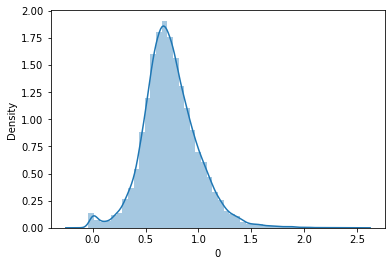

In [114]:
sns.distplot(df[0])
plt.show()

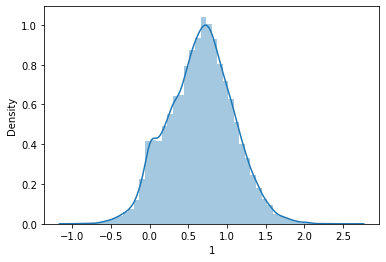

In [115]:
sns.distplot(df[1])
plt.show()

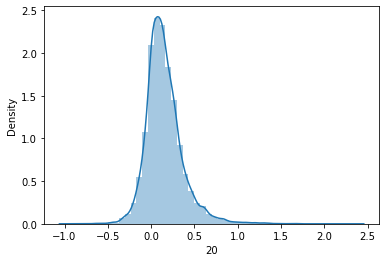

In [116]:
sns.distplot(df[20])
plt.show()

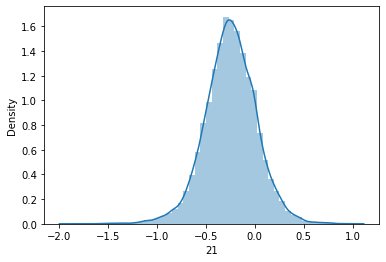

In [117]:
sns.distplot(df[21])
plt.show()

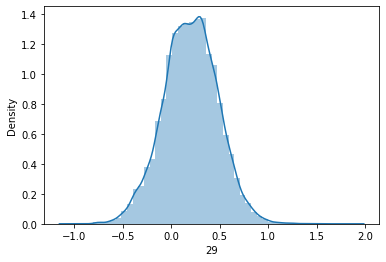

In [118]:
sns.distplot(df[29])
plt.show()

In [119]:
df[29].skew()

-0.022580141

In [120]:
df.skew()

0          0.529888
1         -0.023384
2         -0.391478
3         -0.274166
4         -0.114077
             ...   
96         0.343883
97         0.663822
98        -0.213401
99        -0.266616
ratings    0.226959
Length: 101, dtype: float64

In [121]:
df.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,
       ...
              91,        92,        93,        94,        95,        96,
              97,        98,        99, 'ratings'],
      dtype='object', length=101)

In [122]:
for i in df.columns:
    if df[i].skew()>0.65:
        print('More than 0.65:',i)
    elif df[i].skew()<-0.65:
        print('Less than -0.65:',i)
        
#some columns has skewness more than 0.65 or less than -0.65 which needs to be taken care of.

Less than -0.65: 12
Less than -0.65: 16
More than 0.65: 20
More than 0.65: 26
Less than -0.65: 33
More than 0.65: 40
More than 0.65: 44
Less than -0.65: 47
More than 0.65: 48
Less than -0.65: 50
More than 0.65: 54
Less than -0.65: 55
Less than -0.65: 56
Less than -0.65: 58
More than 0.65: 66
More than 0.65: 70
More than 0.65: 77
Less than -0.65: 81
Less than -0.65: 83
Less than -0.65: 87
More than 0.65: 97


<AxesSubplot:xlabel='ratings', ylabel='count'>

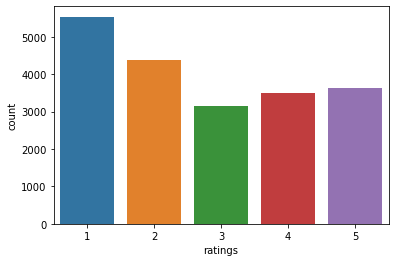

In [123]:
sns.countplot(df['ratings'])

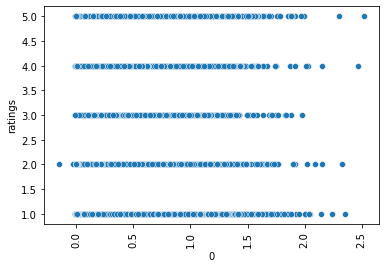

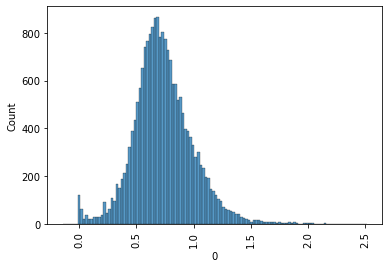

0.52988815


In [124]:
a=df[0]
sns.scatterplot(a,df['ratings'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

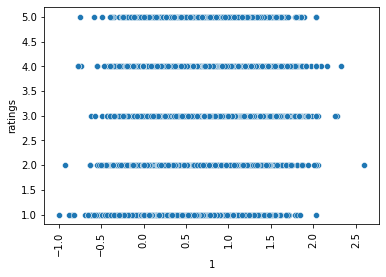

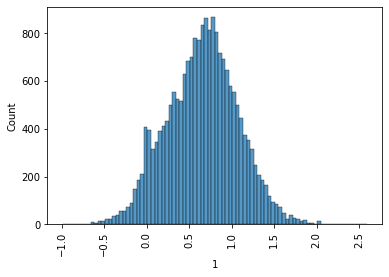

-0.023384392


In [125]:
a=df[1]
sns.scatterplot(a,df['ratings'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

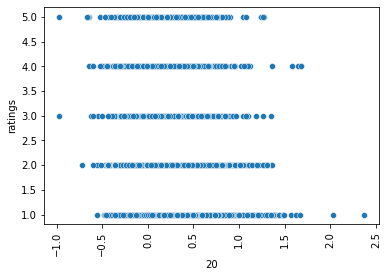

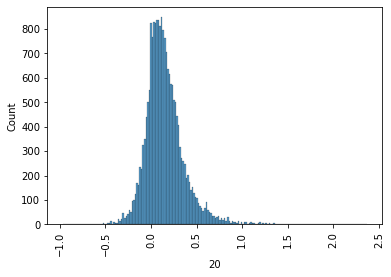

1.2979264


In [126]:
a=df[20]
sns.scatterplot(a,df['ratings'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

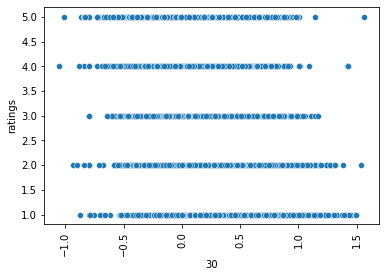

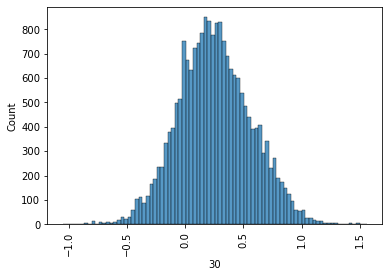

0.11706252


In [127]:
a=df[30]
sns.scatterplot(a,df['ratings'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

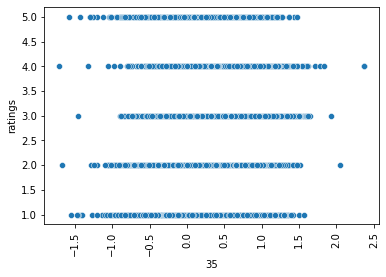

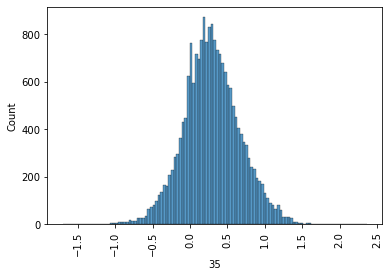

0.03395853


In [128]:
a=df[35]
sns.scatterplot(a,df['ratings'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

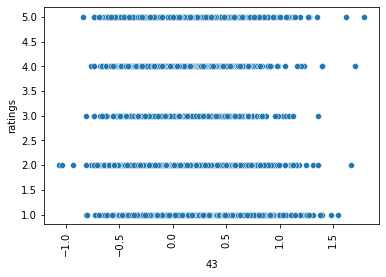

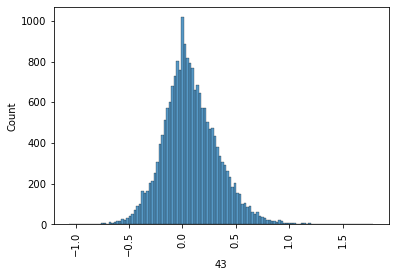

0.5252895


In [129]:
a=df[43]
sns.scatterplot(a,df['ratings'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

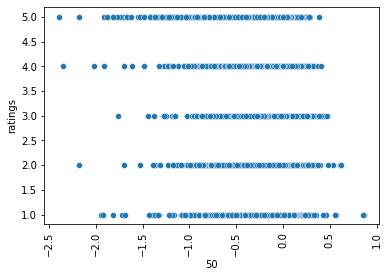

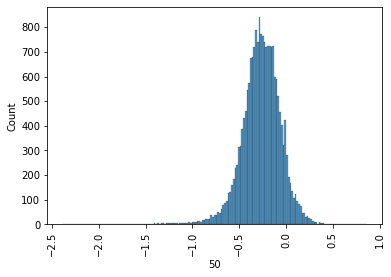

-1.1377543


In [130]:
a=df[50]
sns.scatterplot(a,df['ratings'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

In [131]:
for i in df.columns:
    print(i,'----->',df[i].isnull().sum())
#no null values present

0 -----> 0
1 -----> 0
2 -----> 0
3 -----> 0
4 -----> 0
5 -----> 0
6 -----> 0
7 -----> 0
8 -----> 0
9 -----> 0
10 -----> 0
11 -----> 0
12 -----> 0
13 -----> 0
14 -----> 0
15 -----> 0
16 -----> 0
17 -----> 0
18 -----> 0
19 -----> 0
20 -----> 0
21 -----> 0
22 -----> 0
23 -----> 0
24 -----> 0
25 -----> 0
26 -----> 0
27 -----> 0
28 -----> 0
29 -----> 0
30 -----> 0
31 -----> 0
32 -----> 0
33 -----> 0
34 -----> 0
35 -----> 0
36 -----> 0
37 -----> 0
38 -----> 0
39 -----> 0
40 -----> 0
41 -----> 0
42 -----> 0
43 -----> 0
44 -----> 0
45 -----> 0
46 -----> 0
47 -----> 0
48 -----> 0
49 -----> 0
50 -----> 0
51 -----> 0
52 -----> 0
53 -----> 0
54 -----> 0
55 -----> 0
56 -----> 0
57 -----> 0
58 -----> 0
59 -----> 0
60 -----> 0
61 -----> 0
62 -----> 0
63 -----> 0
64 -----> 0
65 -----> 0
66 -----> 0
67 -----> 0
68 -----> 0
69 -----> 0
70 -----> 0
71 -----> 0
72 -----> 0
73 -----> 0
74 -----> 0
75 -----> 0
76 -----> 0
77 -----> 0
78 -----> 0
79 -----> 0
80 -----> 0
81 -----> 0
82 -----> 0
83 -----> 0
84

<AxesSubplot:>

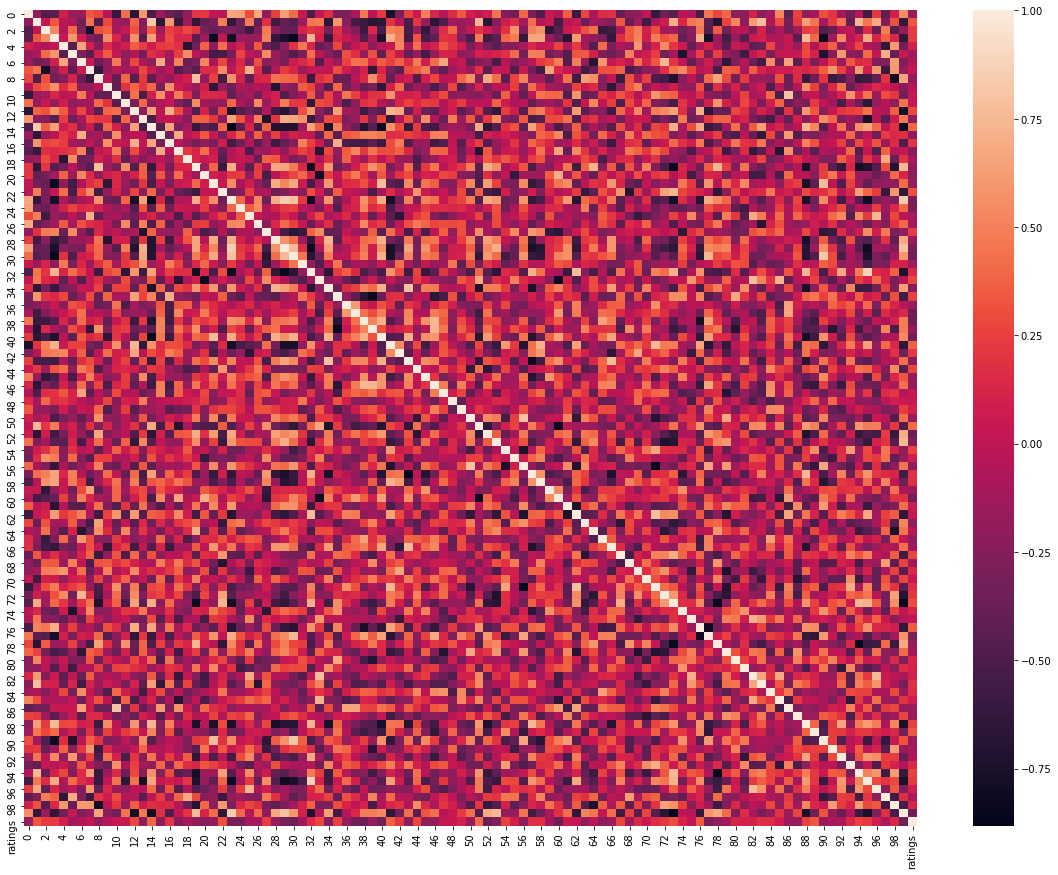

In [132]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

In [133]:
df.corr()['ratings'][0:50].sort_values()

30   -0.351040
38   -0.349425
37   -0.349042
40   -0.339266
29   -0.306767
24   -0.304904
23   -0.301455
34   -0.243571
17   -0.238768
20   -0.237487
43   -0.224580
13   -0.205232
15   -0.203573
8    -0.187726
39   -0.184889
46   -0.184861
21   -0.183599
19   -0.182958
45   -0.179352
36   -0.174825
0    -0.170563
28   -0.159383
31   -0.136899
5    -0.135602
26   -0.113394
18   -0.106274
25   -0.099310
6    -0.041816
9    -0.026066
11    0.025164
7     0.028555
47    0.036377
10    0.037043
48    0.037471
4     0.102789
49    0.106363
32    0.148287
16    0.196491
42    0.215081
2     0.229969
3     0.234660
27    0.234783
35    0.253821
44    0.266929
33    0.272866
12    0.284385
22    0.307306
1     0.331149
41    0.369274
14    0.390267
Name: ratings, dtype: float64

In [134]:
df.corr()['ratings'][50:100].sort_values(ascending=False)

51    0.416870
76    0.352620
89    0.336769
73    0.296413
67    0.273943
54    0.263070
94    0.257669
88    0.254772
95    0.226975
72    0.223750
57    0.183878
58    0.183553
83    0.178822
71    0.169059
84    0.164900
69    0.146693
93    0.145582
98    0.132259
74    0.122321
80    0.118047
81    0.107293
82    0.096430
55    0.090504
96    0.077724
85    0.073718
61    0.051675
70    0.037974
62    0.026154
75    0.005769
64   -0.016250
92   -0.071394
97   -0.087360
91   -0.089158
79   -0.114391
59   -0.115434
68   -0.136008
66   -0.137089
86   -0.153537
90   -0.161395
50   -0.162886
87   -0.164895
78   -0.190953
56   -0.204027
63   -0.211479
65   -0.211924
53   -0.270822
77   -0.310363
60   -0.340136
99   -0.356227
52   -0.366480
Name: ratings, dtype: float64

# Outlier removal

In [135]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df))


df_new=df[(z<3.0).all(axis=1)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

#The loss percent is too high. So we will try adjusting the threshold

(20155, 101)
(16814, 101)
loss_percent=  16.576531877945918


In [136]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df))


df_new=df[(z<5.5).all(axis=1)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)


(20155, 101)
(20007, 101)
loss_percent=  0.7343091044405854


In [137]:
df=df_new

# Model training starts

#### Trying linear regression model

In [138]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=np.round(lr.predict(x_test),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.36944594443557055
root_mean_sqaured_error: 1.1743340537364644
mean_absolute_error: 0.9067966016991504


In [139]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=np.round(np.abs(lr.predict(x_test)),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.37035995647480147
root_mean_sqaured_error: 1.173482624185534
mean_absolute_error: 0.9057971014492754


In [140]:
#let us try the same model after removing skewness from the columns
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=np.round(lr.predict(x_test),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.38635516716134255
root_mean_sqaured_error: 1.1584813164310162
mean_absolute_error: 0.8873063468265867


In [141]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=np.round(np.abs(lr.predict(x_test)),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.39092522735749713
root_mean_sqaured_error: 1.1541594162077393
mean_absolute_error: 0.8853073463268366


In [142]:
#trying different polynomials for LinearRegression with df
#varying the degree of polynomial in default Linear regresion model and finding their accuracy

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]


#degree=1
#r=Ridge()
lr=LinearRegression()
poly = PolynomialFeatures(1)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('polynomial is: 1')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=2
#r=Ridge()
lr=LinearRegression()
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('polynomial is: 2')
print('r2_score is:',r2_score(y_test,y_pred))


#applying polynomial linear regression is reducing r2_score.

polynomial is: 1
r2_score is: 0.4112540333040994
polynomial is: 2
r2_score is: 0.18798797032265246


# Trying KNN Regression

In [144]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn=KNN.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred_knn))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred_knn)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))

r2_score is: 0.3767580407494179
root_mean_sqaured_error: 1.1675052315801915
mean_absolute_error: 0.8940029985007497


In [146]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn=np.round(KNN.predict(x_test),0)
print('r2_score is:',r2_score(y_test,y_pred_knn))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred_knn)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))

r2_score is: 0.3407688167047005
root_mean_sqaured_error: 1.2007410671934136
mean_absolute_error: 0.8660669665167416


In [148]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn=KNN.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred_knn))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred_knn)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))

r2_score is: 0.3767580407494179
root_mean_sqaured_error: 1.1675052315801915
mean_absolute_error: 0.8940029985007497


# Now trying decision tree regressor

In [155]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
y_pred=np.round(np.abs(dtc.predict(x_test)),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.0008705896157029658
root_mean_sqaured_error: 1.4782277974958242
mean_absolute_error: 1.0312343828085957


In [156]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
y_pred=np.round(np.abs(dtc.predict(x_test)),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: -0.042659233752669445
root_mean_sqaured_error: 1.5100860306916142
mean_absolute_error: 1.0614692653673163


In [158]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
y_pred=np.round(np.abs(dtc.predict(x_test)),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: -0.026778274571032323
root_mean_sqaured_error: 1.4985416865762515
mean_absolute_error: 1.0452273863068466


# Trying random forest regression

In [157]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
dtc=RandomForestRegressor()
dtc.fit(x_train,y_train)
y_pred=np.round(np.abs(dtc.predict(x_test)),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.440053374466159
root_mean_sqaured_error: 1.1066334899863732
mean_absolute_error: 0.8093453273363318


In [160]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=np.round(rfr.predict(x_test),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.4405103804857744
root_mean_sqaured_error: 1.1061818028287869
mean_absolute_error: 0.8108445777111444


In [161]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

pt_y=PowerTransformer() #initiating object from class
y=pt_y.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=np.round(rfr.predict(x_test),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.40142707411619416
root_mean_sqaured_error: 0.7810933071206277
mean_absolute_error: 0.6217917274948032


# Trying gradient boosting regression

In [162]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

#pt_x=PowerTransformer()
#x_pt=pt_x.fit_transform(x)

#pt_price=PowerTransformer()
#y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=GradientBoostingRegressor(n_estimators=1000)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.4899637926517032
root_mean_sqaured_error: 1.0561631168426604
mean_absolute_error: 0.8353626506908071


 Accuracy of most models is quiet low. Lets try different vectorization techniques.

In [89]:
vector_df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,ratings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
20164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
20165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
20166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [94]:
#trying KNN Regression
x=vector_df.iloc[:,0:-1]
y=vector_df.iloc[:,-1]

#pt=PowerTransformer()
#x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn=KNN.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred_knn))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred_knn)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))

#KNN regressor accuracy is decresed using Bag of words

r2_score is: 0.2616005732844485
root_mean_sqaured_error: 1.2729557965967402
mean_absolute_error: 1.0243430837878036


Using Bag of words is further reducing the r2_score. It is better to improvise the word2vec model.

In [4]:
df=pd.read_csv('review_rating_converted_to_vector.csv')

In [5]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,141,142,143,144,145,146,147,148,149,ratings
0,0,0.544658,0.022243,0.158816,0.136427,0.050979,-0.073544,-0.367009,-0.144580,0.018684,...,-0.110616,0.384476,-0.032173,0.166699,0.427985,0.253359,0.004958,0.400512,0.194915,3
1,1,0.425974,-0.012353,0.043735,0.247931,-0.000445,-0.209485,-0.249521,-0.043347,0.033225,...,-0.103837,0.363232,-0.014074,0.118452,0.249744,0.244672,-0.020778,0.287012,0.133874,4
2,2,0.358884,0.049879,0.344260,0.498283,0.042159,-0.130753,-0.388983,-0.305780,-0.135487,...,0.028825,0.470471,-0.214023,0.076118,0.416070,0.604064,-0.118548,0.345853,-0.190607,5
3,3,0.312293,-0.021205,0.126334,0.210186,-0.133921,-0.362197,-0.325697,0.158857,0.432679,...,-0.236319,0.251402,0.385588,0.558151,0.105551,0.327370,-0.292019,0.719047,-0.084437,5
4,4,0.477152,-0.047082,0.028260,0.301818,-0.020334,-0.212847,-0.419087,-0.003247,0.089501,...,-0.232541,0.260667,0.052491,0.031983,0.291309,0.293433,-0.092359,0.404409,0.072559,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19873,19873,0.512084,0.039372,0.226183,0.244667,0.007022,-0.002923,-0.374233,-0.162264,-0.146711,...,-0.056566,0.527279,-0.210894,0.206505,0.437365,0.336921,0.005584,0.172889,0.227472,5
19874,19874,0.240386,-0.027370,0.245218,0.079433,-0.107550,0.007487,-0.247499,-0.009100,-0.114543,...,0.035532,0.333079,-0.054038,0.574609,0.288115,0.400101,-0.255242,0.334821,-0.153798,5
19875,19875,0.299740,0.045001,0.079072,0.274703,-0.052783,0.013524,-0.286771,-0.087724,-0.087316,...,-0.172231,0.338337,0.044710,0.212407,0.375761,0.531648,-0.155638,0.242596,0.074633,5
19876,19876,0.632520,0.023893,-0.102451,0.518124,0.053257,-0.173890,-0.482243,-0.112759,0.129653,...,-0.355193,0.440304,0.061763,-0.237233,0.113245,0.214945,-0.025092,0.331294,0.546153,5


# Trying linear regression

In [6]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=np.round(lr.predict(x_test),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#The accuracy of linear regression model has increased slightly after retraining the word2vec.

r2_score is: 0.40204371420865437
root_mean_sqaured_error: 1.153465603034744
mean_absolute_error: 0.8888329979879276


In [7]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=np.round(np.abs(lr.predict(x_test)),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.40566084107922584
root_mean_sqaured_error: 1.1499715681902207
mean_absolute_error: 0.885814889336016


In [8]:
#let us try the same model after removing skewness from the columns
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=np.round(lr.predict(x_test),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#We are noting an inprovement in accuracy after increasing the number of fields in the vector.

r2_score is: 0.42216398242620823
root_mean_sqaured_error: 1.1338934190276817
mean_absolute_error: 0.8601609657947686


# Trying KNN Regression

In [9]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn=KNN.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred_knn))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred_knn)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))

r2_score is: 0.44770541954103094
root_mean_sqaured_error: 1.108550088989574
mean_absolute_error: 0.8387826961770624


In [11]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

scaler=StandardScaler()
x=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn=KNN.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred_knn))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred_knn)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))

r2_score is: 0.4504906072313709
root_mean_sqaured_error: 1.1057513810528121
mean_absolute_error: 0.8364688128772636


In [12]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

scaler=StandardScaler()
x=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn=KNN.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred_knn))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred_knn)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))

r2_score is: 0.44770541954103094
root_mean_sqaured_error: 1.108550088989574
mean_absolute_error: 0.8387826961770624


# Trying RandomForestRegression

In [13]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
dtc=RandomForestRegressor()
dtc.fit(x_train,y_train)
y_pred=np.round(np.abs(dtc.predict(x_test)),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#surprisingly r2_score has increased drastically in case of RandomForestRegression.

r2_score is: 0.9406565122796868
root_mean_sqaured_error: 0.3633761873336319
mean_absolute_error: 0.10035211267605634


In [14]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt=PowerTransformer()
x=pt.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
dtc=RandomForestRegressor()
dtc.fit(x_train,y_train)
y_pred=np.round(np.abs(dtc.predict(x_test)),0)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.9408825827090976
root_mean_sqaured_error: 0.36268338177048426
mean_absolute_error: 0.10035211267605634


# Trying GradientBoostingRegression

In [18]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x=pt_x.fit_transform(x)

#pt_price=PowerTransformer()
#y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
gbr=GradientBoostingRegressor(n_estimators=1000)
gbr.fit(x_train,y_train)
y_pred=np.round(np.abs(gbr.predict(x_test)),0)
print("r2_score for GradientBoostingRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#the result is great.

r2_score for GradientBoostingRegression is:  0.9912962884676874
root_mean_sqaured_error: 0.1391624848265458
mean_absolute_error: 0.011820925553319919


# Saving the final model

In [19]:
import pickle
filename='review_rating.pkl'
pickle.dump(gbr,open(filename,'wb'))